## Import Libraries

In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d
from quspin.basis import spinless_fermion_basis_1d
import numpy as np
import matplotlib.pyplot as plt
import itertools
plt.rcParams['figure.figsize'] = [10, 8]

## Define Constants

In [2]:
N = 6
N_filled = N // 2
P_neg1 = 1
t = -0.5
g = 1
m = 1
PBC = True

## Spin Basis Simulation

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


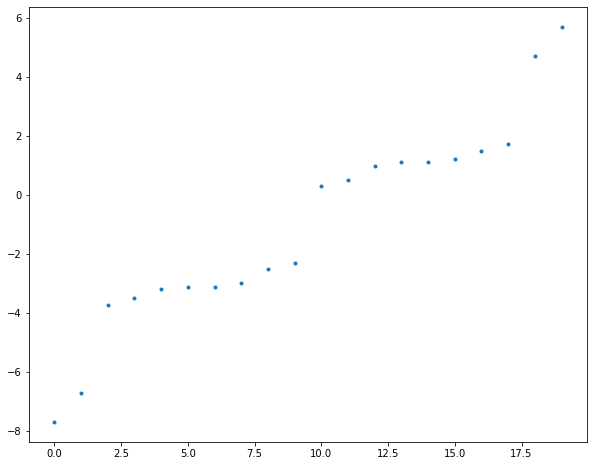

In [5]:
spin_basis = spin_basis_1d(N, pauli=-1, Nup=N_filled)
static_terms = []
dynamic_terms = []

### Hopping term
L = (N if PBC else N-1)
hop_coupling = [[-t, i, (i+1) % N] for i in range(L)]
if PBC and N % 4 == 0:
    hop_coupling[-1][0] = -hop_coupling[-1][0]
static_terms += [["+-", hop_coupling]]
static_terms += [["-+", hop_coupling]]

### Mass term
mass_coupling = [[m * (-1) ** i, i, i] for i in range(N)]
static_terms += [["+-", mass_coupling]]

### E-field term
E_link_parity = lambda x : -1 if (x % 4) == 2 else 1
for i in range(N):
    E_coupling = [P_neg1 * E_link_parity(i)] + list(range(i+1))
    static_terms += [["z" * (i+1), [E_coupling]]]
    
### Plotting spectrum
H = hamiltonian(static_terms, dynamic_terms, basis=spin_basis, dtype=np.float64)
spin_eigvals = H.eigvalsh()
plt.plot(spin_eigvals, ".")
plt.show()

## Fermion Basis